In [1]:
import semopy # SEM optimization in python
import pandas as pd
import numpy as np 
import os # for base_dir
from scipy import stats
import graphviz

from PIL import Image
from IPython.display import display

In [17]:
base_dir=os.getcwd()
if os.name == 'nt':
    path_break='\\'
else:
    path_break='/'

In [13]:
data = pd.read_excel('attitudes_SEM_data.xlsx')
data.dropna(how='any', inplace=True)

In [22]:
#data = data[['XX_1', 'XX_2', 'XX_3', 'AT_1', 'AT_2','AT_3', 'AT_4', 'AT_5', 'AT_6', 'IN_1', 'IN_2', 'IN_3', 'IN_4', 'IN_5', 'IN_6', 'BE_1', 'BE_2', 'BE_3', 'BE_4', 'BE_5', 'BE_6', 'BE_7', 'BE_8', 'BE_9', 'CO_1', 'CO_2', 'CO_3', 'CO_4', 'CO_5', 'CO_6', 'NO_1', 'NO_2', 'NO_3']]
#data.to_excel('attitudes_SEM_data.xlsx')

In [18]:
def run_SEM(data, description, name):
    model_SEM = semopy.Model(description)
    optimize_results = model_SEM.fit(data)
    #print(optimize_results)

    inspect_estimates = model_SEM.inspect(mode='list', what='names', std_est=True)
    inspect_df = pd.DataFrame(inspect_estimates)
    inspect_df.to_excel(f'{base_dir}{path_break}Estimates{path_break}inspect_estimates_{name}.xlsx')

    fit_stats = semopy.calc_stats(model_SEM)
    fit_stats_df = pd.DataFrame(fit_stats)
    fit_stats_df.to_excel(f'{base_dir}{path_break}Fit_Stats{path_break}fit_stats_{name}.xlsx')

    g = semopy.semplot(model_SEM, f'{base_dir}{path_break}Graphs{path_break}model_{name}.jpg', plot_covs=True)
    # In the future, remove p-values for less clutered graphs
    img = Image.open(f'{base_dir}{path_break}Graphs{path_break}model_{name}.jpg')
    display(img)

    fit_ideal_dict = {
    #    'chi2': '0',
    #    'chi2 p-value': '>0.05',
        'RMSEA': '<0.1',
        'CFI': '>0.9',
        'GFI': '>0.9',
        'TLI': '>0.95'
    }

    fit_actual_dict = {
    #    'chi2': fit_stats_df.at['Value', 'chi2'],
    #    'chi2 p-value': fit_stats_df.at['Value', 'chi2 p-value'],  
        'RMSEA': fit_stats_df.at['Value', 'RMSEA'],  
        'CFI': fit_stats_df.at['Value', 'CFI'],
        'GFI': fit_stats_df.at['Value', 'GFI'],
        'TLI': fit_stats_df.at['Value', 'TLI']
    }

    print(f'Model Name: {name}')
    for key in fit_ideal_dict.keys():
        print(f'Ideal {key} is {fit_ideal_dict[key]}, actual is {round(fit_actual_dict[key], 2)}')

    semopy.report(model_SEM, f'{base_dir}{path_break}Reports{path_break}model_{name}')

In [14]:
print(data.columns)

Index(['PRE or POST', 'Month', 'Year', 'XX_1', 'XX_2', 'XX_3', 'CO_6', 'AT_5',
       'BE_6', 'NO_3', 'CO_2', 'IN_6', 'CO_5', 'IN_5', 'CO_3', 'AT_2', 'IN_2',
       'NO_2', 'CO_1', 'BE_4', 'IN_1', 'BE_3', 'NO_1', 'AT_6', 'AT_1', 'BE_9',
       'BE_2', 'BE_1', 'IN_3', 'BE_8', 'AT_3', 'AT_4', 'BE_7', 'BE_5', 'IN_4',
       'CO_4'],
      dtype='object')


In [15]:
question_data = data.copy()
question_data.drop(['PRE or POST', 'Month', 'Year'], axis=1, inplace=True)
question_data

,XX_1,XX_2,XX_3,CO_6,AT_5,BE_6,NO_3,CO_2,IN_6,CO_5,...,BE_2,BE_1,IN_3,BE_8,AT_3,AT_4,BE_7,BE_5,IN_4,CO_4
0,5,2,4,2,3,3,1.0,4,1.0,1.0,...,4,4,4,4,1,4.0,4.0,4.0,4.0,4.0
1,3,1,5,1,4,5,4.0,4,3.0,1.0,...,3,5,4,3,1,4.0,4.0,4.0,4.0,4.0
2,3,1,5,1,4,5,4.0,4,3.0,1.0,...,3,5,4,3,1,4.0,4.0,4.0,4.0,4.0
3,2,4,2,1,5,5,1.0,2,1.0,1.0,...,5,5,5,5,1,5.0,5.0,5.0,5.0,4.0
4,5,4,5,2,5,1,1.0,1,1.0,2.0,...,4,3,2,3,4,3.0,5.0,3.0,4.0,5.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
256,2,2,2,2,4,3,1.0,2,1.0,2.0,...,4,5,5,3,2,4.0,3.0,4.0,4.0,3.0
257,3,4,5,3,4,4,4.0,4,2.0,2.0,...,3,5,4,3,1,4.0,5.0,4.0,4.0,3.0
258,4,2,1,3,3,3,3.0,3,3.0,3.0,...,3,3,3,3,3,3.0,3.0,3.0,3.0,3.0
259,4,2,5,1,5,4,1.0,2,3.0,2.0,...,5,5,5,4,1,4.0,5.0,4.0,4.0,4.0


In [16]:
print(semopy.efa.explore_cfa_model(question_data))

eta1 =~ AT_4 + AT_1 + IN_2 + IN_3 + IN_4 + AT_2 + AT_3 + IN_1 + BE_2 + BE_1 + BE_4 + AT_5 + BE_3 + BE_5 + BE_7 + AT_6 + BE_6 + BE_8 + BE_9
eta4 =~ AT_4 + AT_1 + AT_3 + AT_2 + CO_5 + CO_1 + AT_5 + CO_4 + CO_3 + CO_2 + CO_6
eta5 =~ AT_4 + AT_1 + AT_2 + IN_1 + IN_4 + IN_2 + IN_3 + IN_6 + IN_5 + CO_4
eta6 =~ NO_1 + NO_2 + BE_7 + AT_6



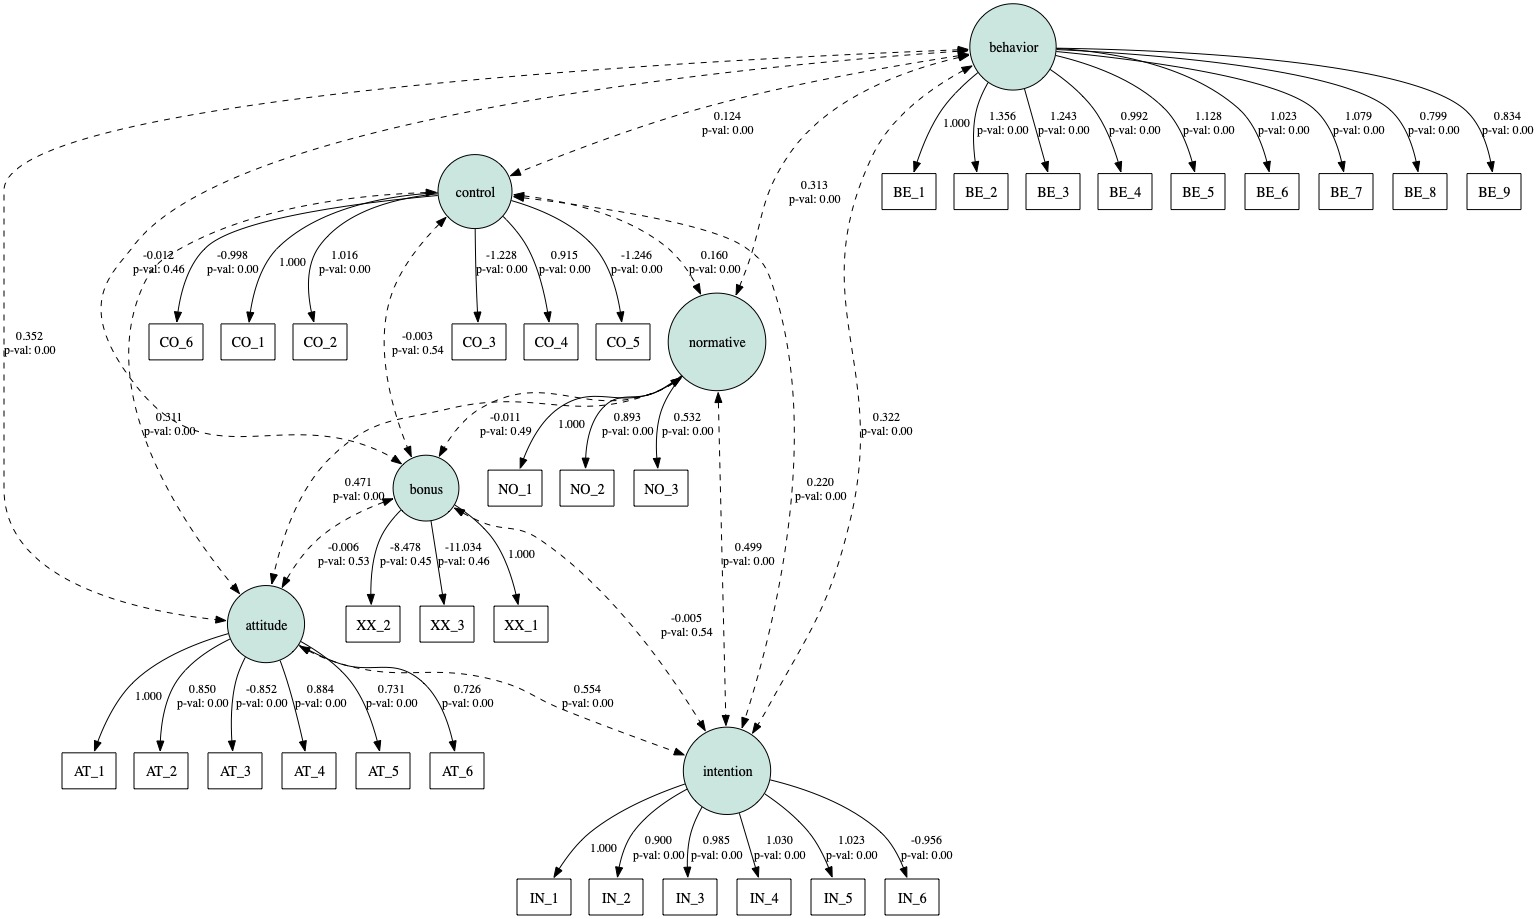

Model Name: attitudes_base_SEM
Ideal RMSEA is <0.1, actual is 0.07
Ideal CFI is >0.9, actual is 0.87
Ideal GFI is >0.9, actual is 0.78
Ideal TLI is >0.95, actual is 0.85


In [20]:
base_model='''
attitude =~ AT_1 + AT_2 + AT_3 + AT_4 + AT_5 + AT_6
intention =~ IN_1 + IN_2 + IN_3 + IN_4 + IN_5 + IN_6
behavior =~ BE_1 + BE_2 + BE_3 + BE_4 + BE_5 + BE_6 + BE_7 + BE_8 + BE_9
control =~ CO_1 + CO_2 + CO_3 + CO_4 + CO_5 + CO_6
normative =~ NO_1 + NO_2 + NO_3
bonus =~ XX_1 + XX_2 + XX_3
'''

run_SEM(question_data, base_model, 'attitudes_base_SEM')

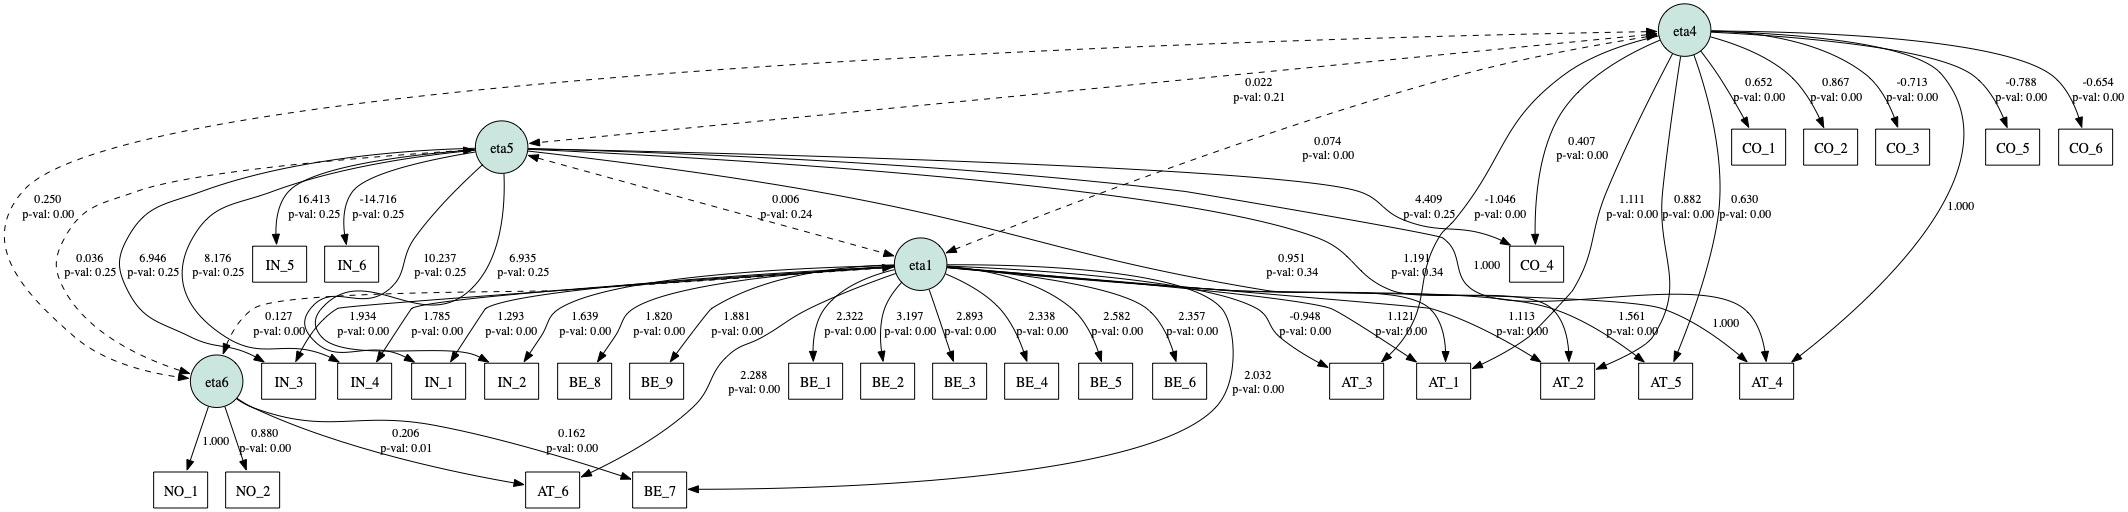

Model Name: attitudes_EFA_SEM
Ideal RMSEA is <0.1, actual is 0.08
Ideal CFI is >0.9, actual is 0.86
Ideal GFI is >0.9, actual is 0.79
Ideal TLI is >0.95, actual is 0.84


In [21]:
efa_model = '''
eta1 =~ AT_4 + AT_1 + IN_2 + IN_3 + IN_4 + AT_2 + AT_3 + IN_1 + BE_2 + BE_1 + BE_4 + AT_5 + BE_3 + BE_5 + BE_7 + AT_6 + BE_6 + BE_8 + BE_9
eta4 =~ AT_4 + AT_1 + AT_3 + AT_2 + CO_5 + CO_1 + AT_5 + CO_4 + CO_3 + CO_2 + CO_6
eta5 =~ AT_4 + AT_1 + AT_2 + IN_1 + IN_4 + IN_2 + IN_3 + IN_6 + IN_5 + CO_4
eta6 =~ NO_1 + NO_2 + BE_7 + AT_6
'''

run_SEM(question_data, efa_model, 'attitudes_EFA_SEM')